## Linear Regression with one variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
w = 10 * np.random.rand() - 5
b = 30 * np.random.rand() - 15

In [3]:
x_train = 20 * np.random.rand(100) - 10
y_train = w * x_train + b + (20 * np.random.rand(100) - 10)

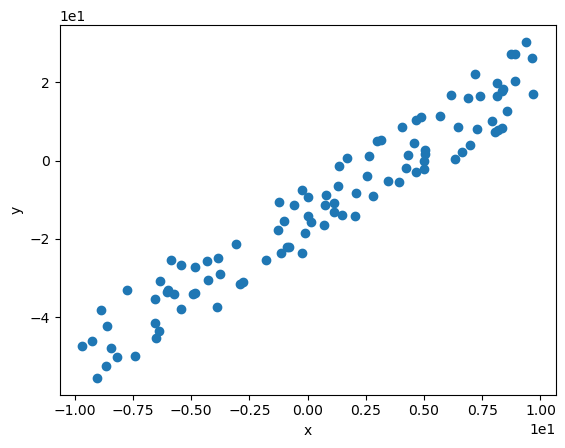

In [4]:
plt.scatter(x_train, y_train)
# give name to the axis
plt.xlabel('x')
plt.ylabel('y')
# divide axis value by 10 and show 1e2 instead of 100
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.show()

In [5]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    
    total_cost = cost / (2 * m)
    return total_cost

In [6]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = dj_db = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
        
    dj_dw, dj_db = dj_dw / m, dj_db / m

    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.5e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    return w, b, J_history, p_history

In [8]:
w_init, b_init = 0, 0
iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.95981e+02  dj_dw: -1.086e+02, dj_db:  1.124e+01   w:  1.086e+00, b:-1.12419e-01
Iteration 1000: Cost 1.59749e+01  dj_dw: -1.832e-05, dj_db:  7.337e-04   w:  3.696e+00, b:-1.41400e+01
Iteration 2000: Cost 1.59749e+01  dj_dw: -9.638e-10, dj_db:  3.860e-08   w:  3.696e+00, b:-1.41407e+01
Iteration 3000: Cost 1.59749e+01  dj_dw: -6.934e-14, dj_db:  2.030e-12   w:  3.696e+00, b:-1.41407e+01
Iteration 4000: Cost 1.59749e+01  dj_dw: -1.272e-14, dj_db:  8.727e-14   w:  3.696e+00, b:-1.41407e+01
Iteration 5000: Cost 1.59749e+01  dj_dw: -1.272e-14, dj_db:  8.727e-14   w:  3.696e+00, b:-1.41407e+01
Iteration 6000: Cost 1.59749e+01  dj_dw: -1.272e-14, dj_db:  8.727e-14   w:  3.696e+00, b:-1.41407e+01
Iteration 7000: Cost 1.59749e+01  dj_dw: -1.272e-14, dj_db:  8.727e-14   w:  3.696e+00, b:-1.41407e+01
Iteration 8000: Cost 1.59749e+01  dj_dw: -1.272e-14, dj_db:  8.727e-14   w:  3.696e+00, b:-1.41407e+01
Iteration 9000: Cost 1.59749e+01  dj_dw: -1.272e-14, dj_db:  8.727e-14   

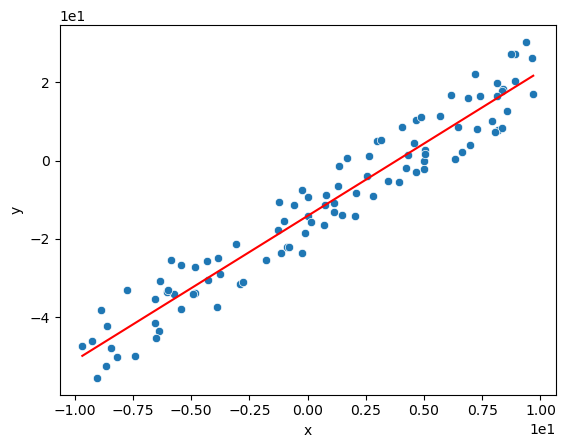

In [9]:
y_predicted = w_final*x_train+b_final
sns.scatterplot(x=x_train, y=y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
sns.lineplot(x=x_train, y=y_predicted, color='red')
plt.show()

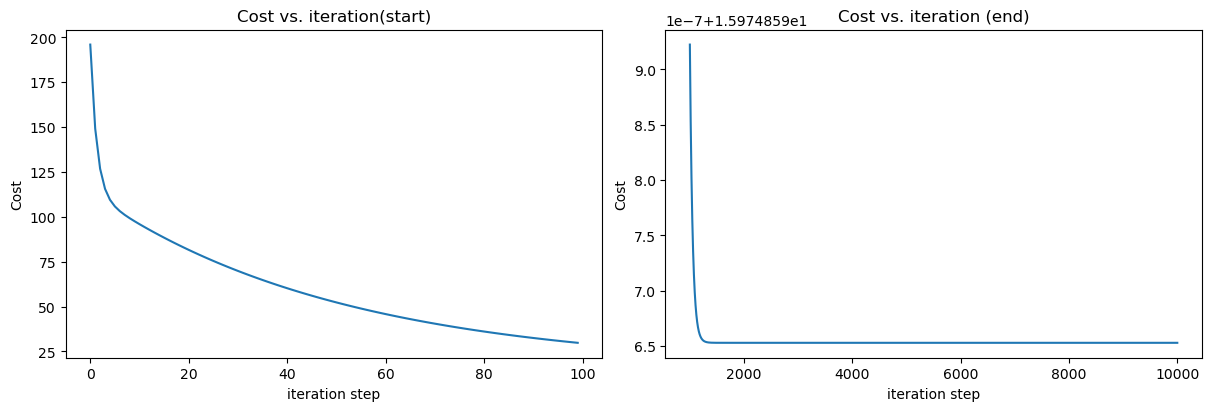

In [10]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [11]:
print(f"Actual w selected randomly: {w},\tPredicted w: {w_final}")
print(f"Actual b selected randomly: {b},\tPredicted b: {b_final}")

Actual w selected randomly: 3.6512853012065865,	Predicted w: 3.6963840534078516
Actual b selected randomly: -13.576440159377674,	Predicted b: -14.140702759437136
